In [1]:
import numpy as np
import matplotlib.pyplot as plt
!wget -O unionfind.py https://raw.githubusercontent.com/deehzee/unionfind/master/unionfind.py
from unionfind import UnionFind

--2025-10-22 05:34:50--  https://raw.githubusercontent.com/deehzee/unionfind/master/unionfind.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8976 (8.8K) [text/plain]
Saving to: ‘unionfind.py’

unionfind.py        100%[===================>]   8.77K  --.-KB/s    in 0.001s  

2025-10-22 05:34:50 (11.9 MB/s) - ‘unionfind.py’ saved [8976/8976]



/content/unionfind.py:28: SyntaxWarning: invalid escape sequence '\l'
  Worst case for union and find: :math:`(N + M \log^* N)`, with


In [2]:
def generar_imagen():
    im = np.zeros((10,10))
    im[3:7, 2:8] = 1
    im[2:5,3:7] = 0
    im[1:2,5:10] = 1
    return im

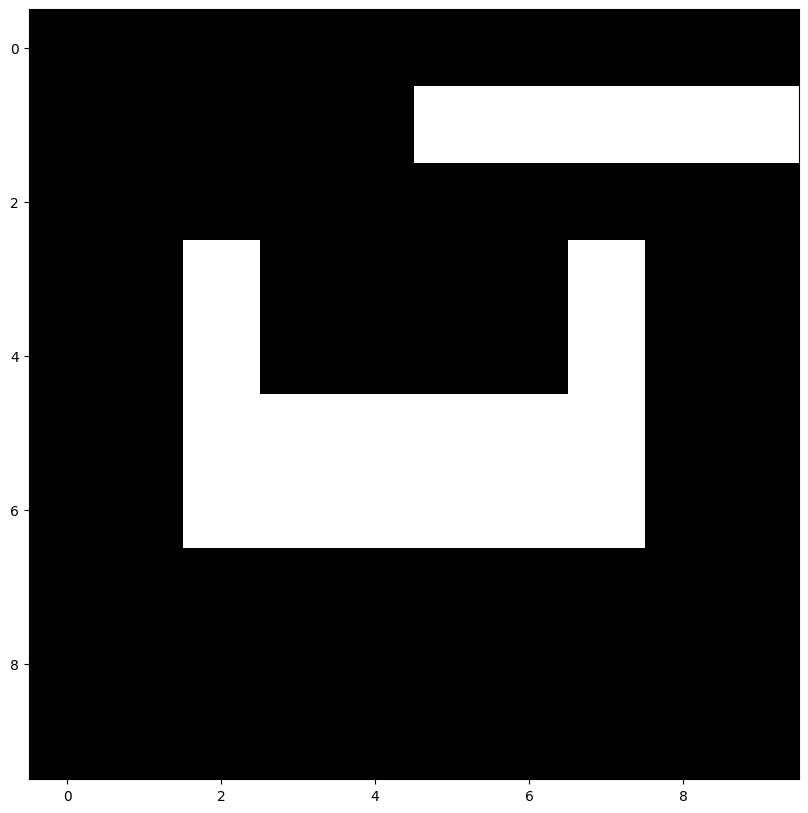

In [3]:
im = generar_imagen()
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='gray')

In [4]:
index = 0
components = np.zeros(im.shape)
uf = UnionFind()
for i in range(1,9):
    for j in range(1,9):
        if im[i,j]==0:
            pass
        elif (components[i,j-1]!=0) and (components[i-1,j]!=0):
            uf.union(components[i,j-1], components[i-1,j])
            components[i,j]=components[i,j-1]
        elif components[i,j-1]!=0:
             components[i,j]=components[i,j-1]
        elif components[i-1,j]!=0:
             components[i,j]=components[i-1,j]
        else:
            index += 1
            uf.union(index,index)
            components[i,j]=index



In [5]:
components


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 2., 2., 2., 2., 2., 2., 0., 0.],
       [0., 0., 2., 2., 2., 2., 2., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

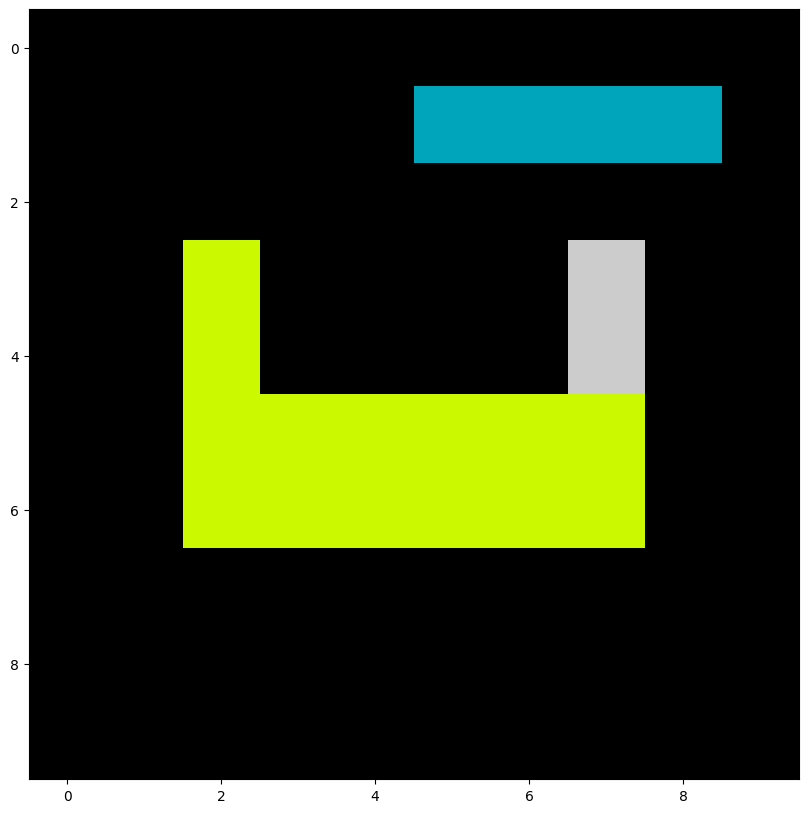

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(components, cmap='nipy_spectral' )

In [7]:
uf.components()

[{np.int64(1)}, {np.int64(2), np.int64(3)}]

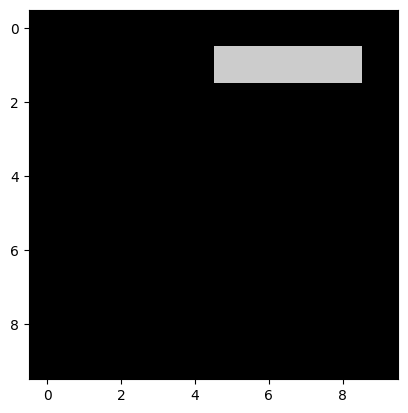

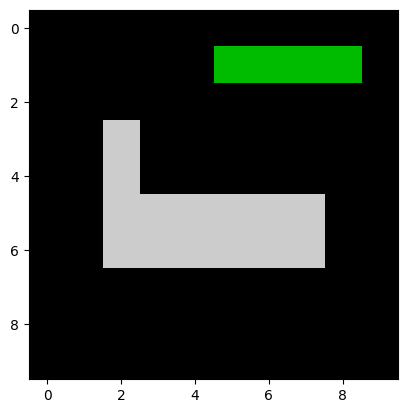

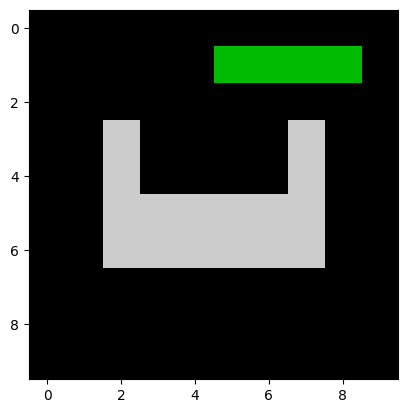

In [8]:
connected_components =np.zeros(im.shape)
for i, s in enumerate(uf.components()):
    for v in s:
        connected_components[components==v] = i+1
        plt.figure()
        plt.imshow(connected_components, cmap='nipy_spectral' )



In [9]:
connected_components

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 2., 2., 2., 2., 2., 2., 0., 0.],
       [0., 0., 2., 2., 2., 2., 2., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### **Usando la implementación de scikit-image**

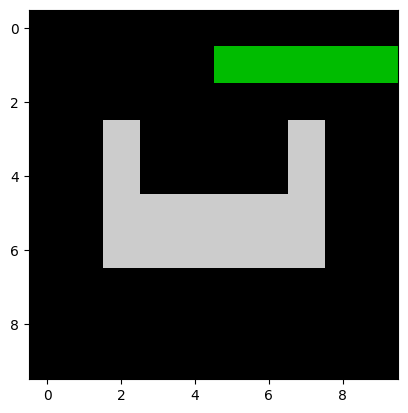

In [10]:
from skimage import measure
connected_components = measure.label(im)
plt.imshow(connected_components, cmap='nipy_spectral' )